In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Spectral"))
sns.set_style("darkgrid")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams["axes.labelsize"] = 15
pd.set_option('display.max_columns', 999)

In [2]:
fort_worth_stat_num = 23104
df = pd.read_csv("HPI_AT_metro.csv")
df.columns
fort_worth = df[df["Statistical Area Number"] == fort_worth_stat_num]
fort_worth = fort_worth[fort_worth["Year"].isin(range(2018,2023))]
fort_worth["Index"] = fort_worth["Index"].astype(float)
fw_index = fort_worth.groupby("Year").mean()["Index"]
fw_index/=fw_index[2018]
fw_index

Year
2018    1.000000
2019    1.051777
2020    1.099225
2021    1.268981
2022    1.542491
Name: Index, dtype: float64

In [3]:
broadmoor = pd.read_csv("closest_addresses_to_2900 Broadmoor Dr, Fort Worth TX.csv")
tanacross = pd.read_csv("closest_addresses_to_3600 Tanacross Dr, Fort Worth TX.csv")
tanacross
tanacross.iloc[:,1:] = tanacross.iloc[:,1:].apply(lambda x: x/x["2018 Appraisal"], axis = 1)
broadmoor.iloc[:,1:] = broadmoor.iloc[:,1:].apply(lambda x: x/x["2018 Appraisal"], axis = 1)
broadmoor_index = broadmoor.mean()
tanacross_index = tanacross.mean()

C:\Users\randymi\AppData\Local\Temp\ipykernel_13192\648739657.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  broadmoor_index = broadmoor.mean()
C:\Users\randymi\AppData\Local\Temp\ipykernel_13192\648739657.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tanacross_index = tanacross.mean()


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\randymi\\Desktop\\nrp_analysis\\closest\\shit.png'

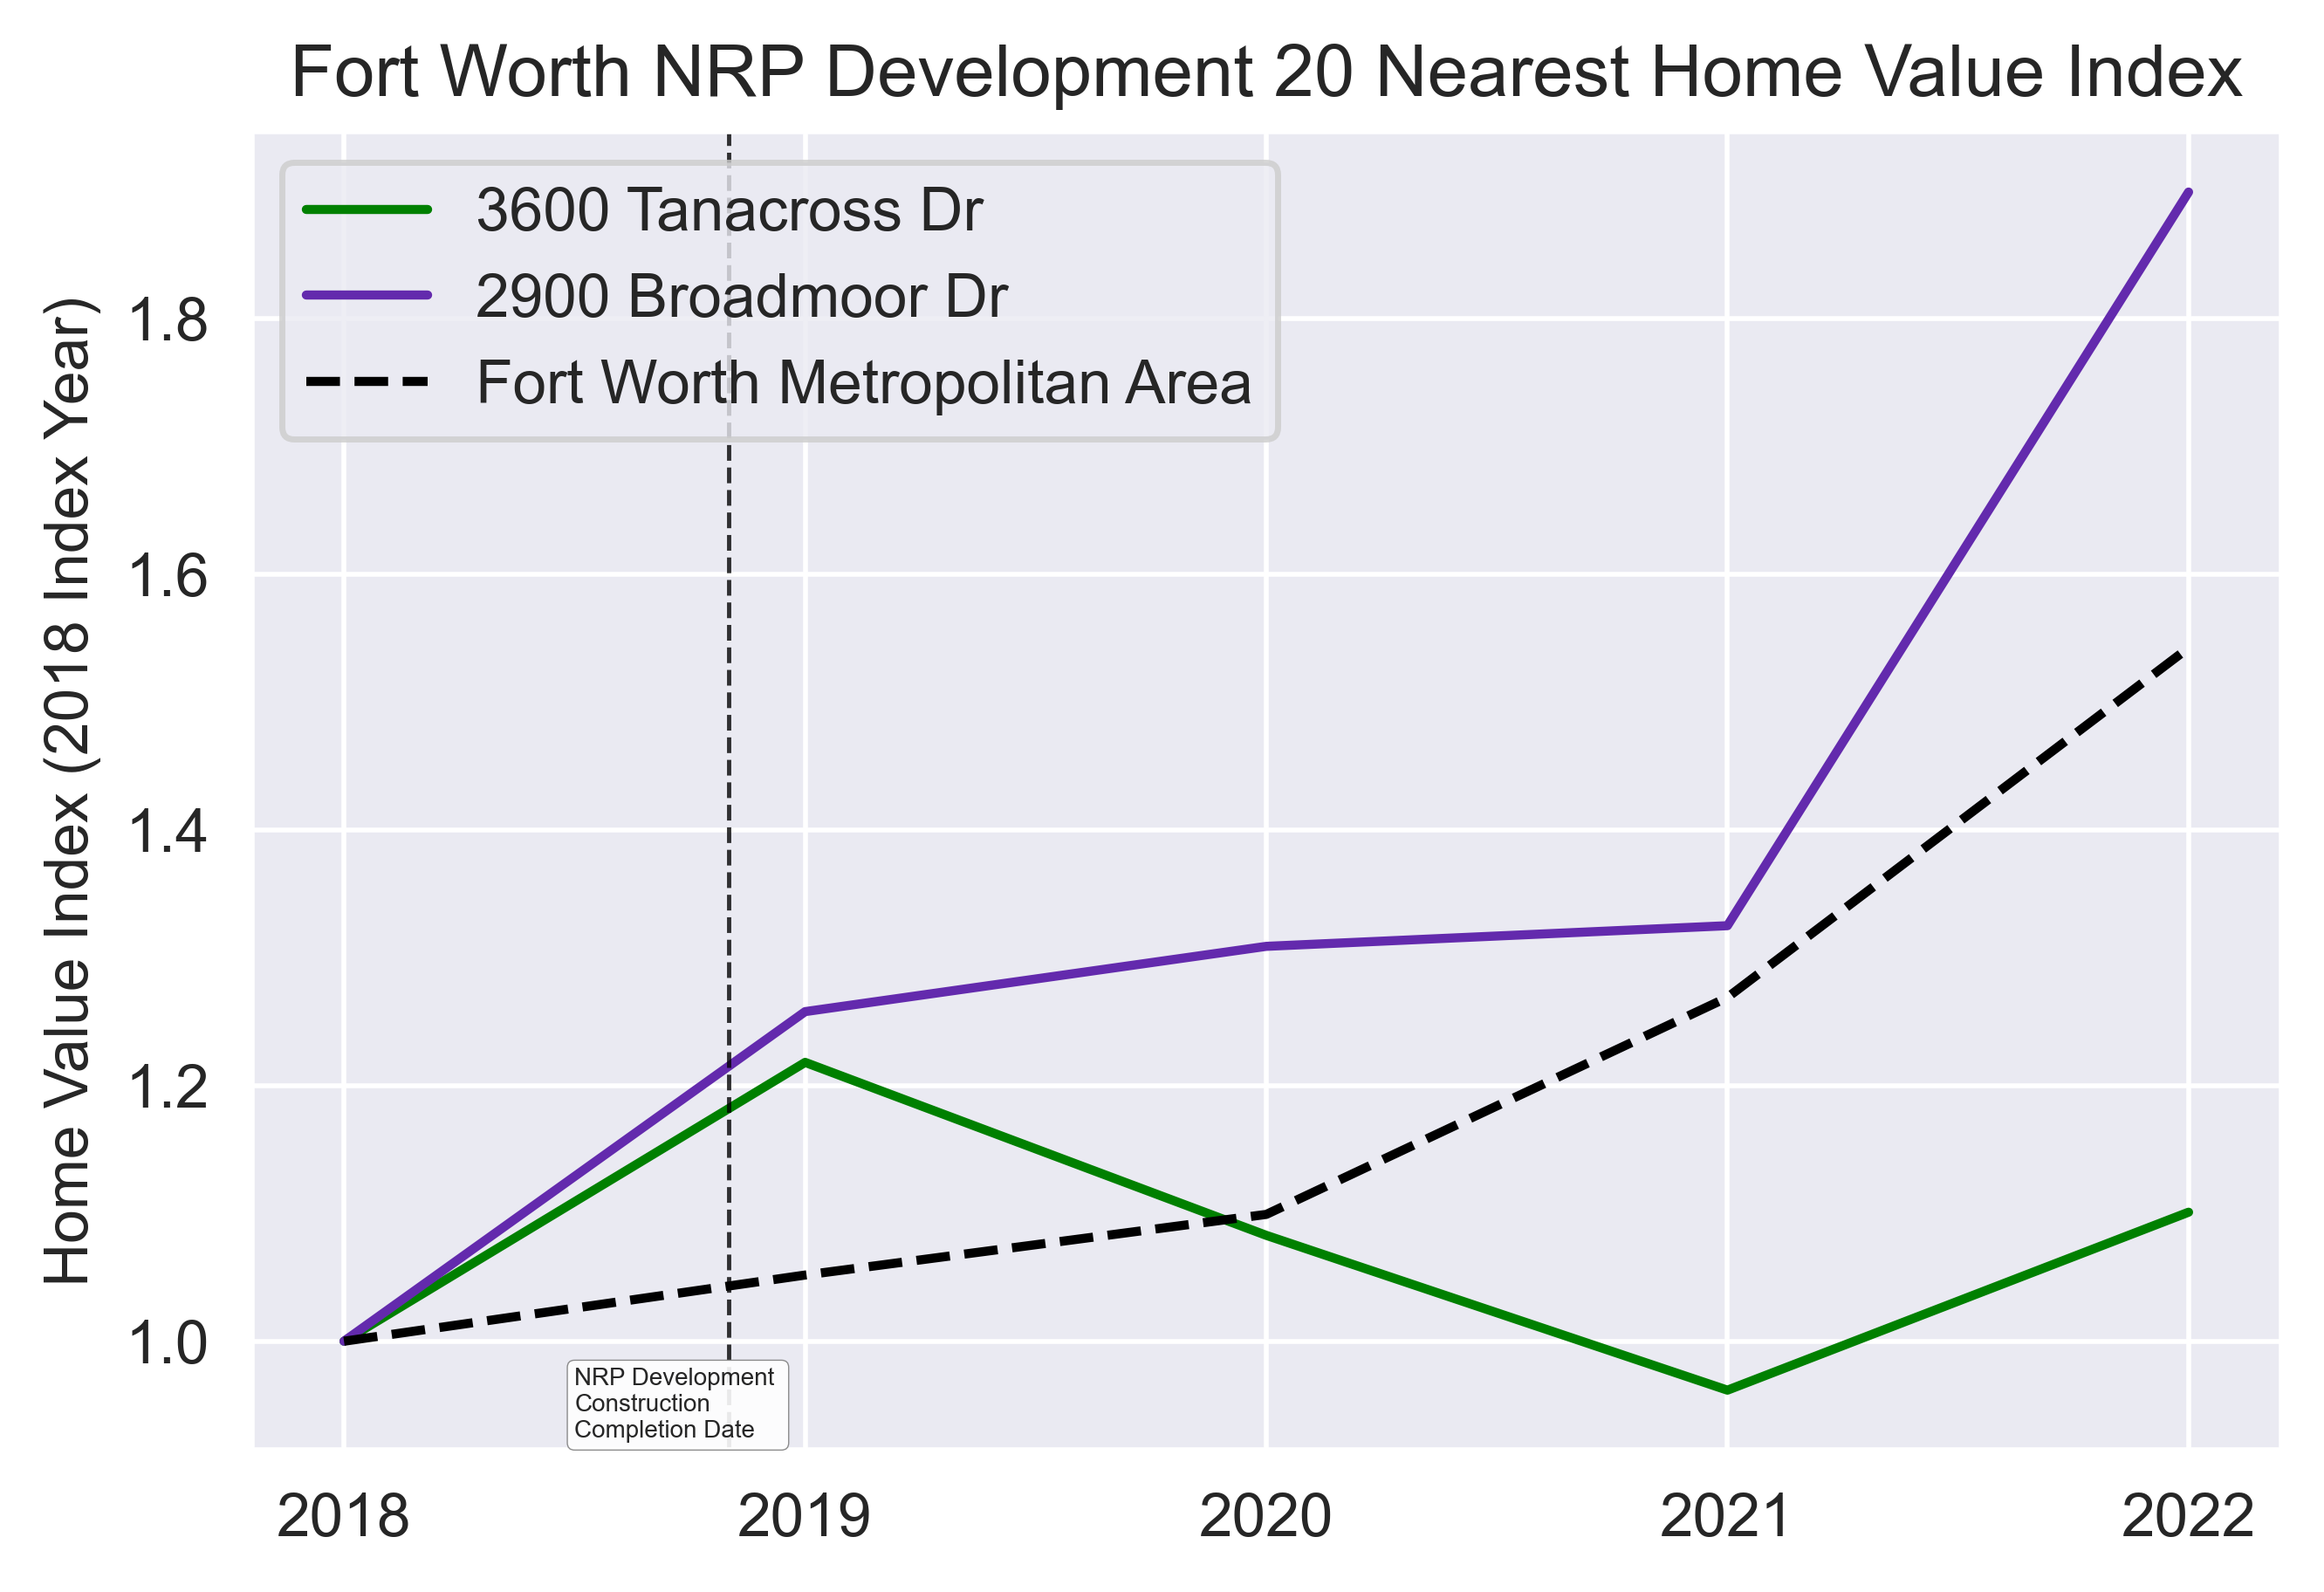

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([2018,2019,2020,2021,2022],tanacross_index, label = "3600 Tanacross Dr", c= cmap[0])
ax.plot([2018,2019,2020,2021,2022],broadmoor_index, label = "2900 Broadmoor Dr", c = cmap[1])
ax.plot([2018,2019,2020,2021,2022],fw_index, label = "Fort Worth Metropolitan Area", c = 'k', linestyle = 'dashed')
ax.set_xticks([2018,2019,2020,2021,2022])
ax.legend(loc="upper left")
ax.set_title("Fort Worth NRP Development 20 Nearest Home Value Index")
ax.set_ylabel("Home Value Index (2018 Index Year)",fontsize = 10)
ax.axvline(2018+10/12, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8)
ax.text(2018.5, 0.95, 'NRP Development \nConstruction\nCompletion Date', ha='left', va='center', fontsize = 4,
         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))
fig.savefig('c:\\Users\\randymi\\Desktop\\nrp_analysis\\closest\\shit.png')


In [37]:
df_sa = pd.read_csv("sanantonio.csv")
df_sa = df_sa.T
df_sa.columns = df_sa.iloc[0,:]
df_sa = df_sa.iloc[[1,2,3,4],:]
df_sa = df_sa.apply(lambda x: x+1)

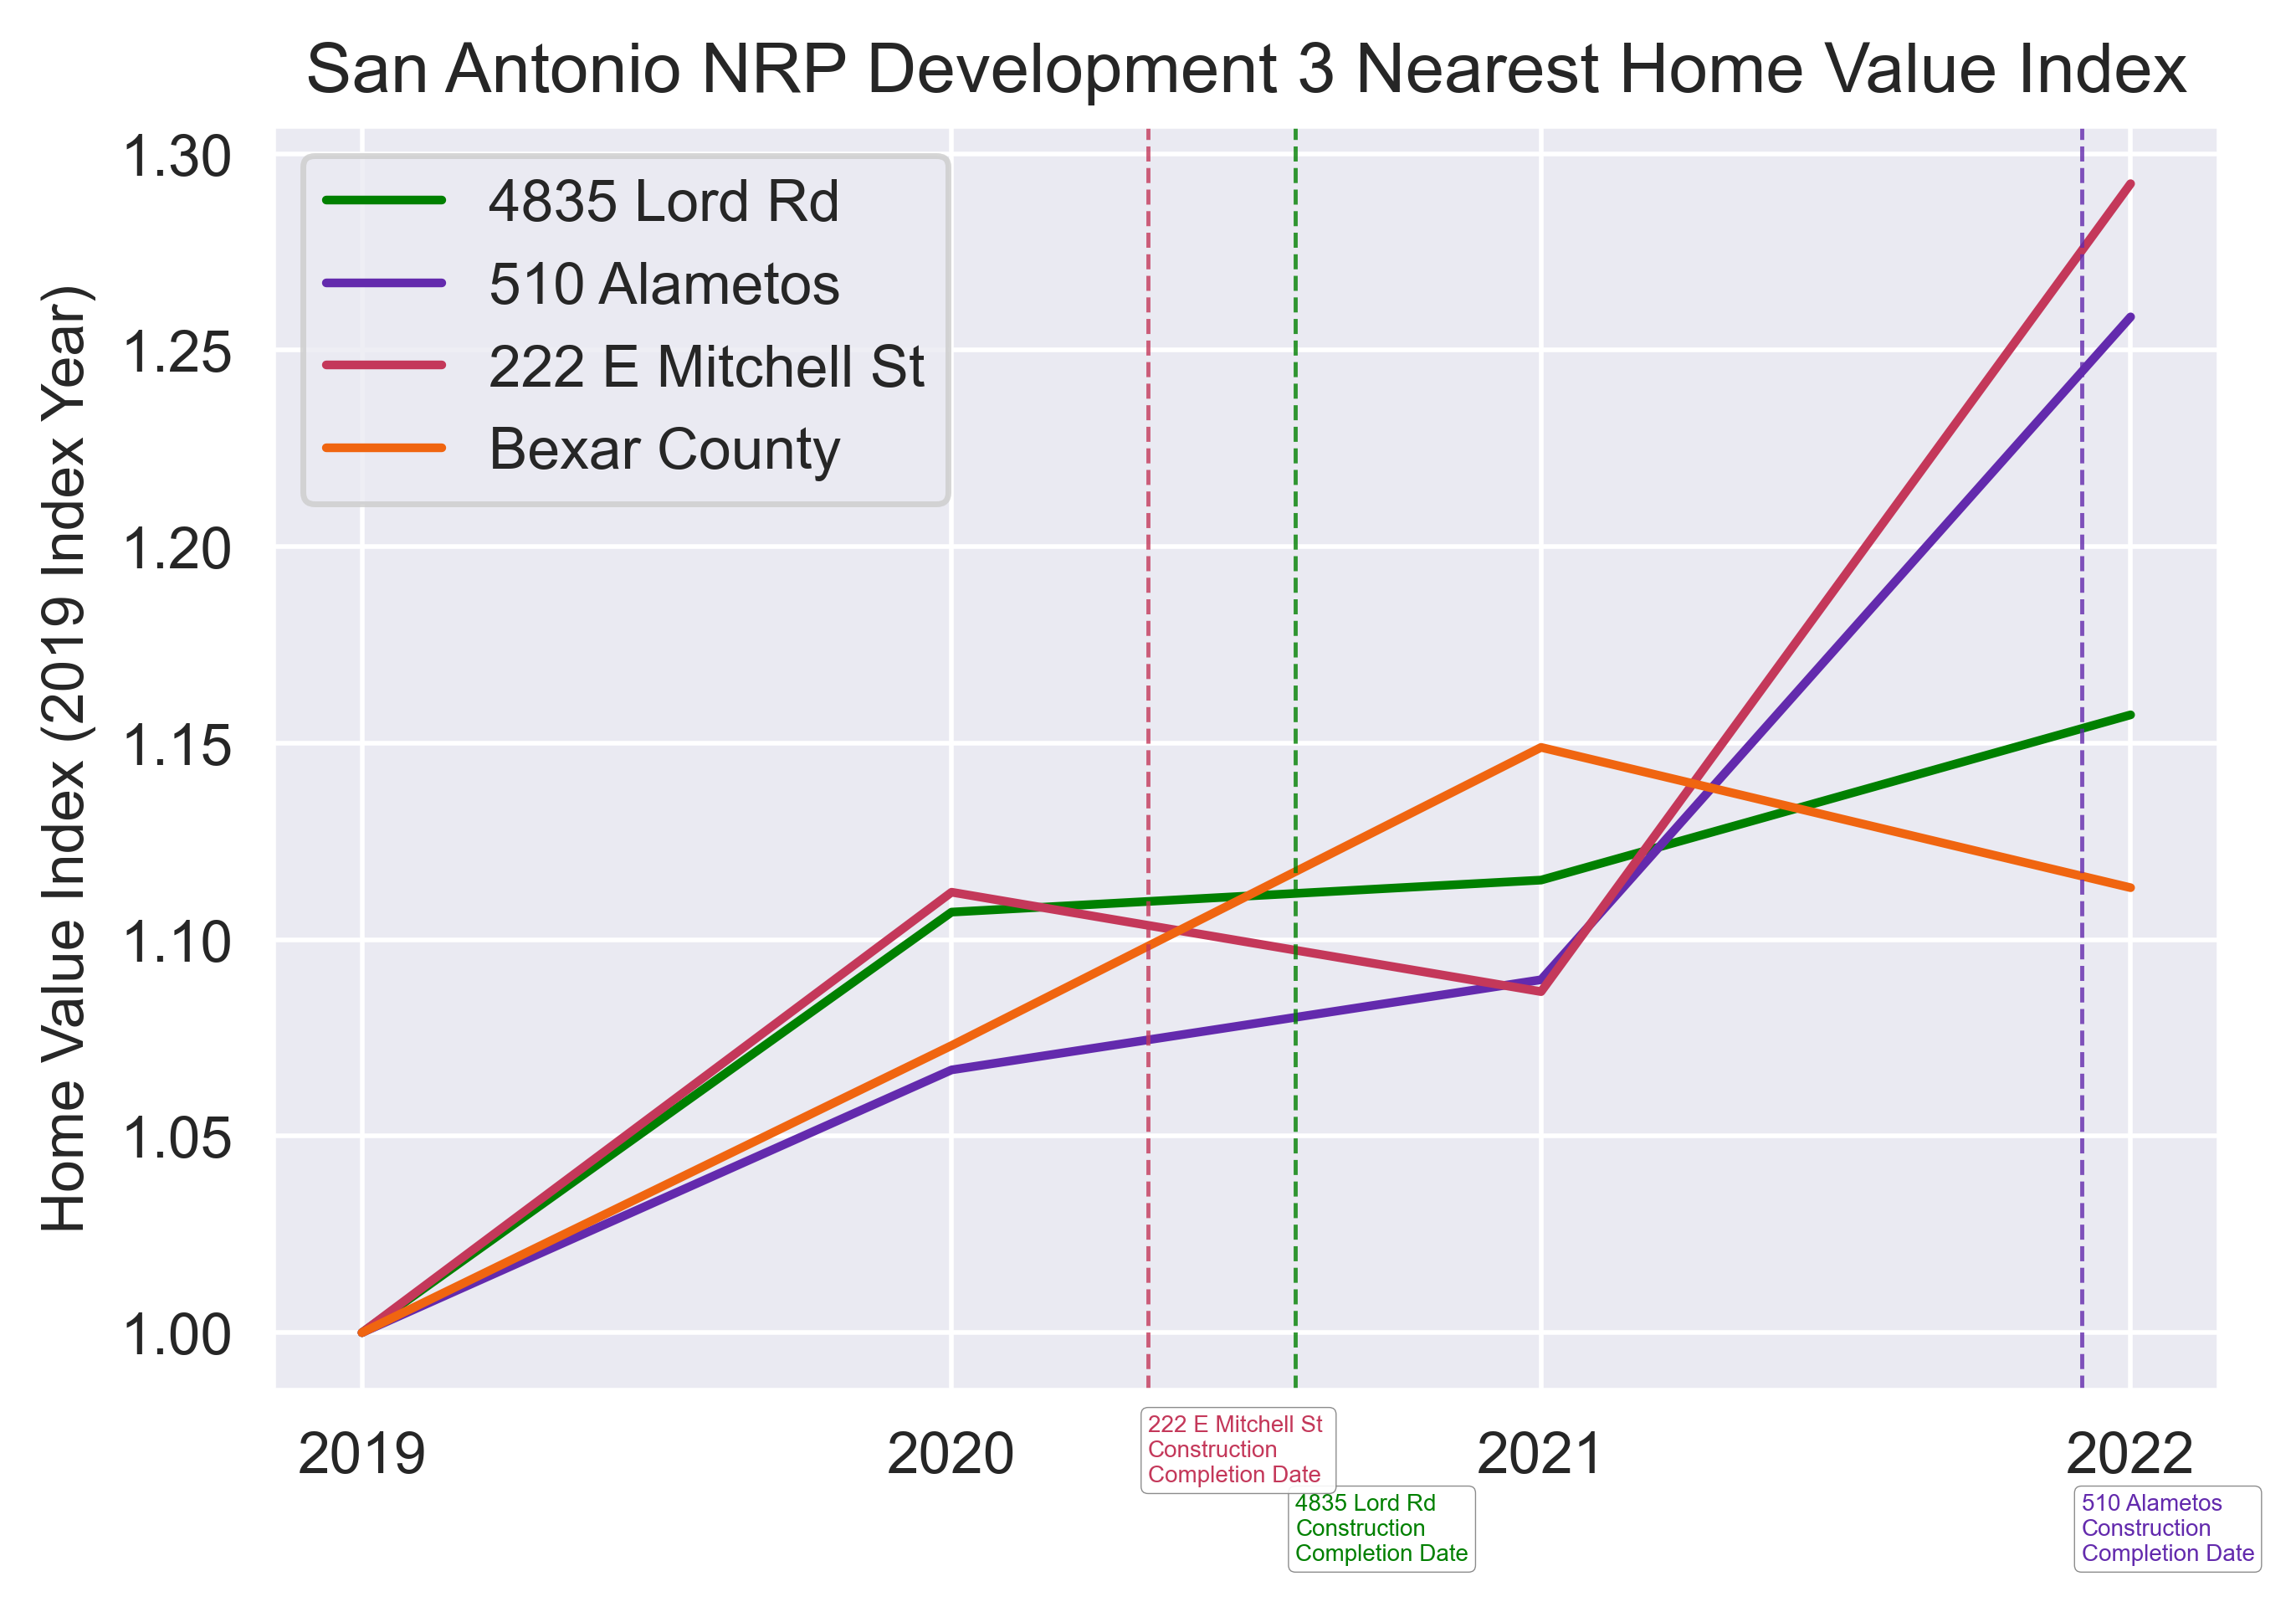

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Lord, 2020 July
# Alametos, 2021 Nov
# Mitchell, 2020 April

ax.plot([2019,2020,2021,2022],df_sa["4835 Lord Rd"].values, label = "4835 Lord Rd", c = cmap[0])
ax.plot([2019,2020,2021,2022],df_sa["510 Alametos"].values, label = "510 Alametos",c = cmap[1])
ax.plot([2019,2020,2021,2022],df_sa["222 E Mitchell St"], label = "222 E Mitchell St", c = cmap[2])
ax.plot([2019,2020,2021,2022],df_sa["Bexar County"], label = "Bexar County", c = cmap[3])
ax.set_xticks([2019,2020,2021,2022])
ax.legend(loc="upper left")
ax.set_title("San Antonio NRP Development 3 Nearest Home Value Index")
ax.set_ylabel("Home Value Index (2019 Index Year)",fontsize = 10)

# add construction completion lines
ax.axvline(2020 + 7/12, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8, c = cmap[0])
ax.text(2020 + 7/12, 0.95, '4835 Lord Rd \nConstruction\nCompletion Date', ha='left', va='center', fontsize = 4, c = cmap[0],
         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))

ax.axvline(2021 + 11/12, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8, c = cmap[1])
ax.text(2021 + 11/12, 0.95, '510 Alametos \nConstruction\nCompletion Date', ha='left', va='center', fontsize = 4, c = cmap[1],
         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))

ax.axvline(2020 + 4/12, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8, c = cmap[2])
ax.text(2020 + 4/12, 0.97, '222 E Mitchell St \nConstruction\nCompletion Date', ha='left', va='center', fontsize = 4,c = cmap[2],
         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))

fig.savefig("San Antonio NRP Development 3 Nearest Home Value Index.png")

In [92]:
df_a = pd.read_csv("austin.csv")
df_a = df_a[df_a["Year"] >= 2018]
years = df_a["Year"]
df_a = df_a.loc[:,list(df_a.columns[1:])].apply(lambda x: x/x[6], axis = 0)
df_a["Year"] = years

,Decker Lofts,Loyola Apartments (Bridge at Loyola),The Terrace at Walnut Creek,FHFA Index,AM Index,Year
6,1.000000,1.000000,1.000000,1.000000,1.000000,2018
7,1.020000,1.142400,1.199520,1.283486,1.334826,2019
8,0.999600,1.119552,1.175530,1.320708,1.455948,2020
9,1.409436,1.752211,1.950211,2.585453,3.961782,2021
10,2.071871,4.043927,7.381462,9.785825,17.994206,2022


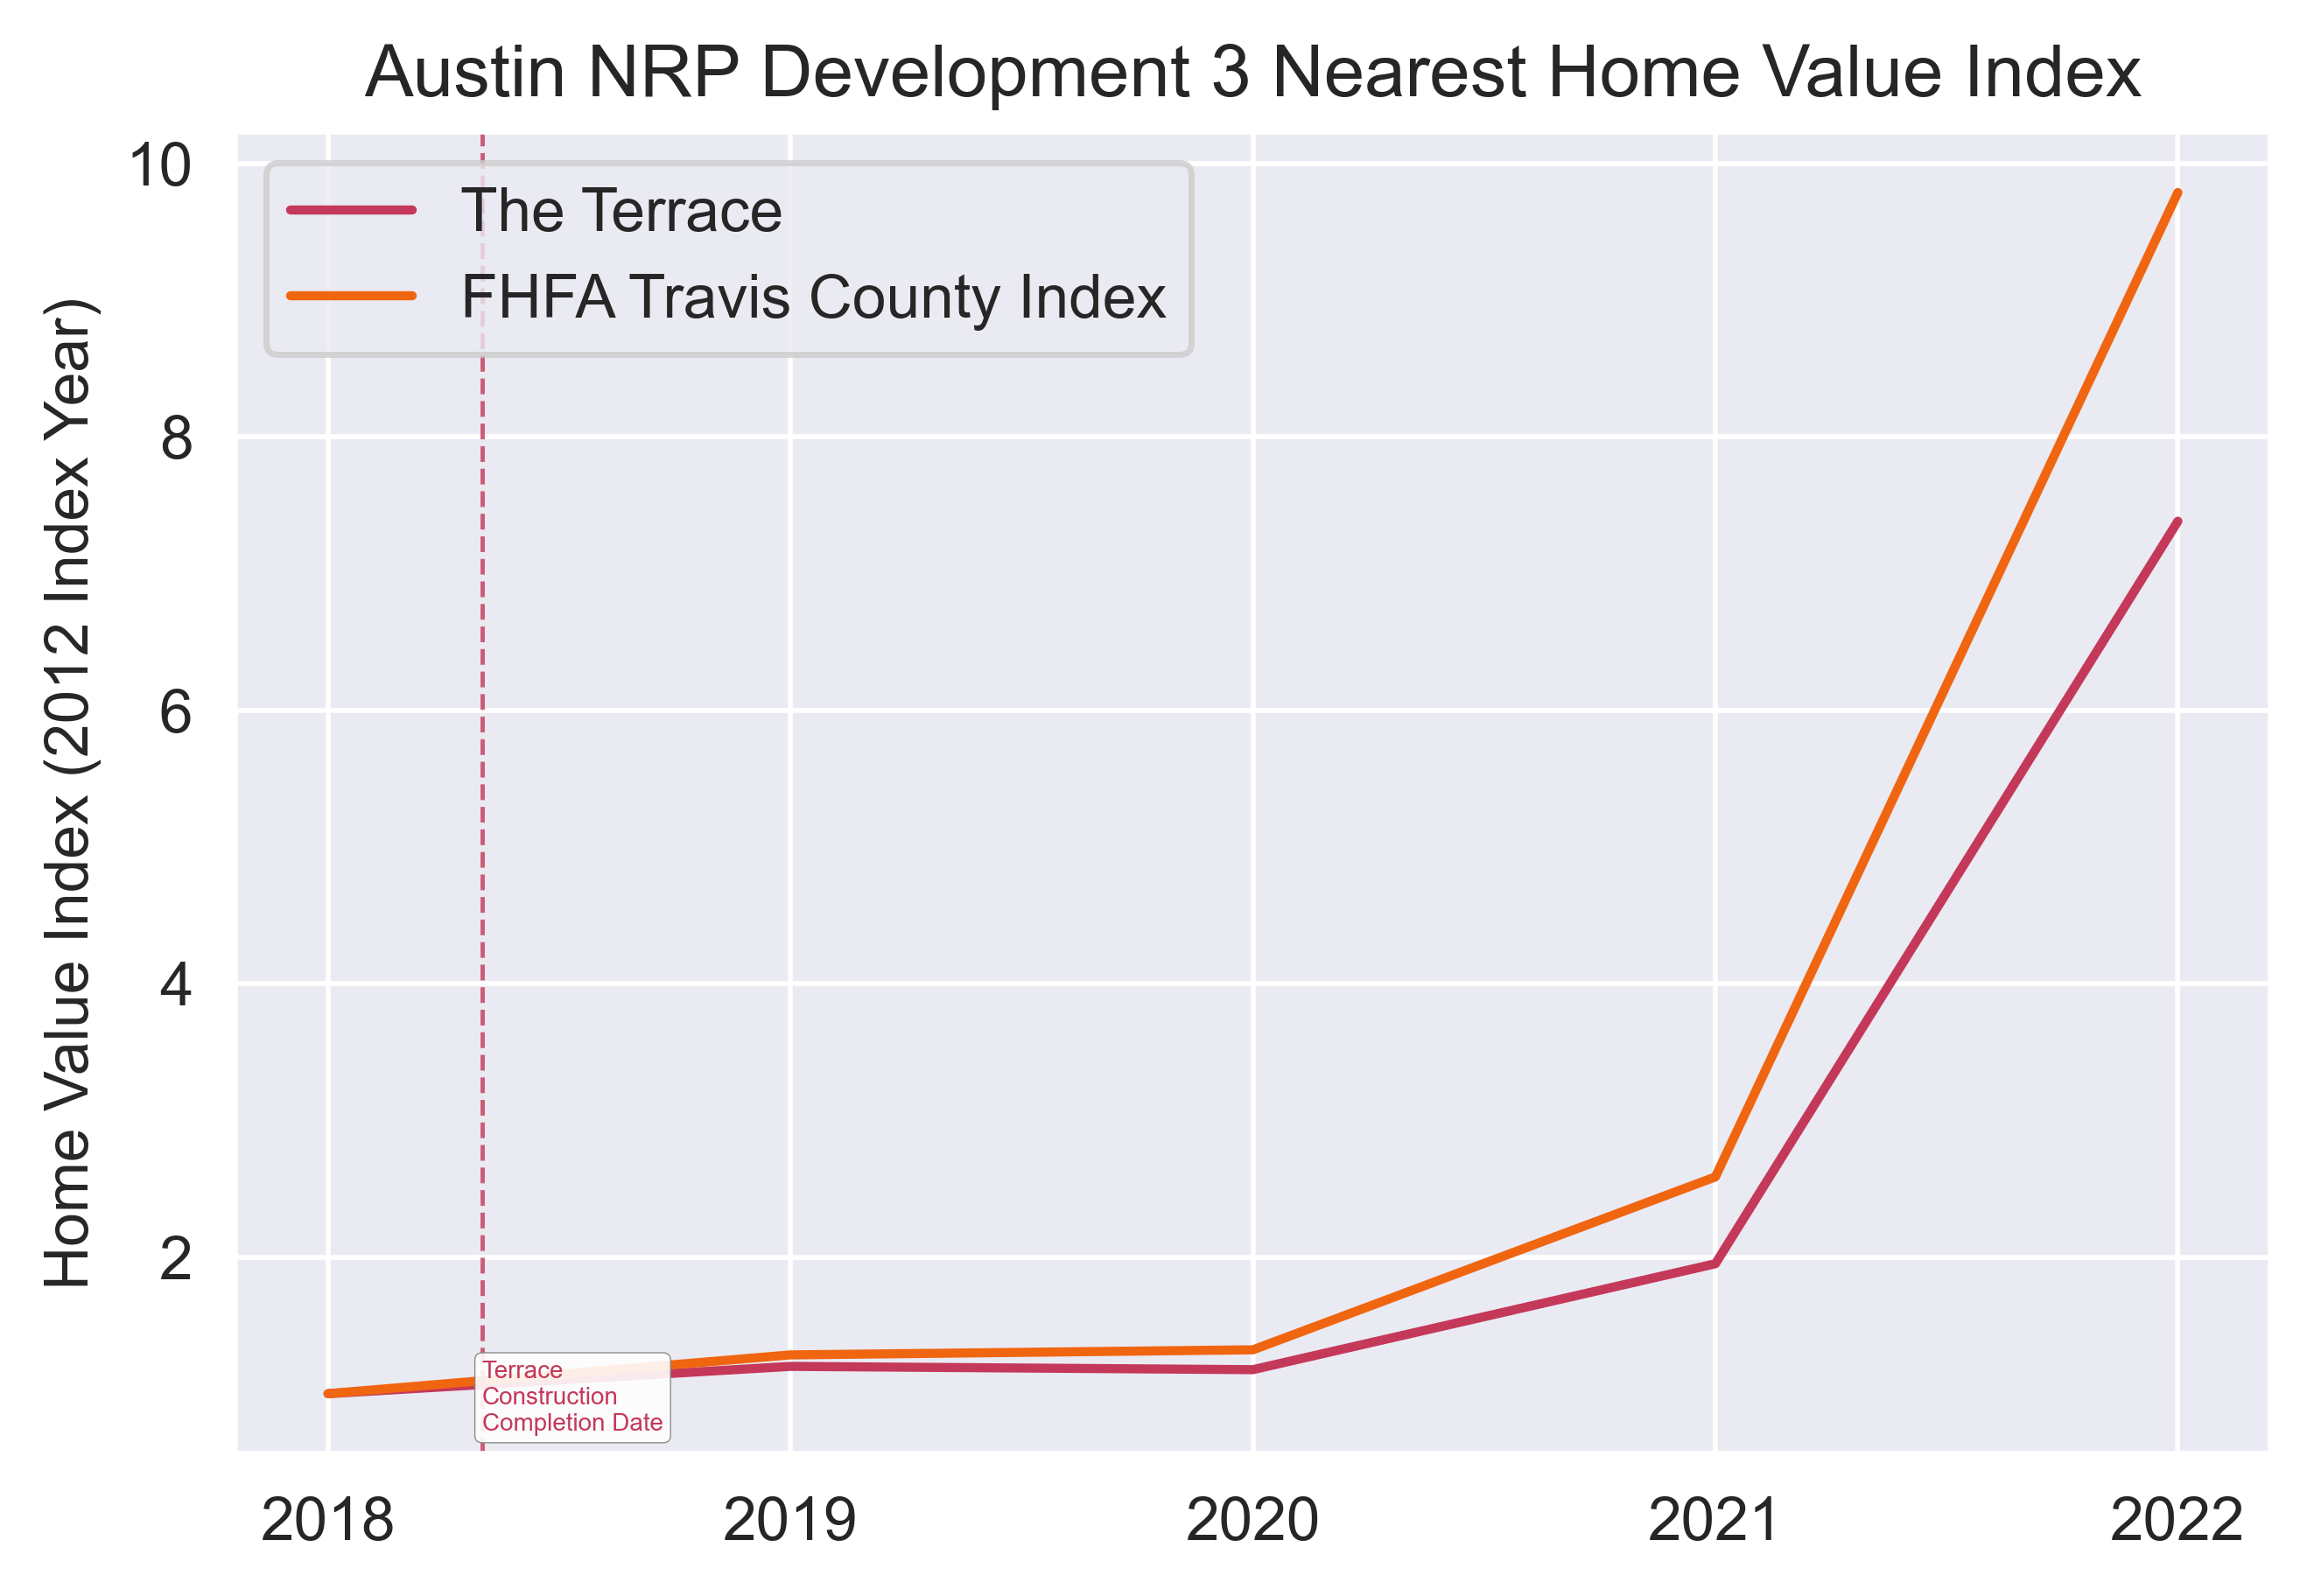

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Decker Lofts, Jan 2022
# Loyla, July 2022
# Terrace, April 2018

date_range = range(2018, 2023)

#ax.plot(date_range,df_a["Decker Lofts"].values, label = "Decker Loft", c = cmap[0])
#ax.plot(date_range,df_a["Loyola Apartments (Bridge at Loyola)"].values, label = "Loyola Apartments",c = cmap[1])
ax.plot(date_range,df_a["The Terrace at Walnut Creek"], label = "The Terrace", c = cmap[2])
ax.plot(date_range,df_a["FHFA Index"], label = "FHFA Travis County Index", c = cmap[3])
ax.set_xticks(date_range)
ax.legend(loc="upper left")
ax.set_title("Austin NRP Development 3 Nearest Home Value Index")
ax.set_ylabel("Home Value Index (2012 Index Year)",fontsize = 10)

# add construction completion lines
#ax.axvline(2022 + 1/12, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8, c = cmap[0])
#ax.text(2022 + 1/12, 0.95, 'Decker Lofts \nConstruction\nCompletion Date', ha='left', va='center', fontsize = 4, c = cmap[0],
#         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))

#ax.axvline(2022 + 7/12, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8, c = cmap[1])
#ax.text(2022 + 7/12, 0.95, 'Loyola Apartments \nConstruction\nCompletion Date', ha='left', va='center', fontsize = 4, c = cmap[1],
#         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))

ax.axvline(2018 + 4/12, color = "black", linestyle = "--", lw = 0.7, alpha = 0.8, c = cmap[2])
ax.text(2018 + 4/12, 0.97, 'Terrace \nConstruction\nCompletion Date', ha='left', va='center', fontsize = 4,c = cmap[2],
         bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9, lw = 0.2))

fig.savefig("Austin NRP Development 3 Nearest Home Value Index.png")